In [5]:
import pandas as pd

In [6]:
url = "https://raw.githubusercontent.com/KLoVi/mini_project_ML_wine_and_smile/main/WineQuality.csv"

In [7]:
df = pd.read_csv(url)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [16]:
df.head(3)

,wine_instances,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,wine_instances
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine,2732
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine,2607
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine,1653


In [13]:
df.rename( columns = { "Unnamed: 0" : "wine_instances"} , inplace = True )

In [15]:
df.head(3)

,wine_instances,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,wine_instances
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine,2732
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine,2607
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine,1653


In [17]:
df.shape

(32485, 15)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_instances        32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
 14  wine_instances        32485 non-null  int64  
dtypes: float64(11), int

In [19]:
df.isna().sum()

wine_instances          0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
wine_instances          0
dtype: int64

In [20]:
df_num = df.select_dtypes( include = ["number"] )

In [23]:
df_num.head(3)

,wine_instances,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_instances
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,2732
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,2607
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,1653


In [36]:
target = df_num["quality"]

In [37]:
features = df_num.drop(columns = "quality")

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [54]:
knn = KNeighborsClassifier(n_neighbors=2)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [56]:
pred = knn.predict(X_test)
pred

array([6, 6, 6, ..., 7, 6, 6])

In [57]:
y_test.values

array([6, 6, 6, ..., 6, 6, 6])

In [58]:
knn.score(X_test, y_test)

0.964906880098507

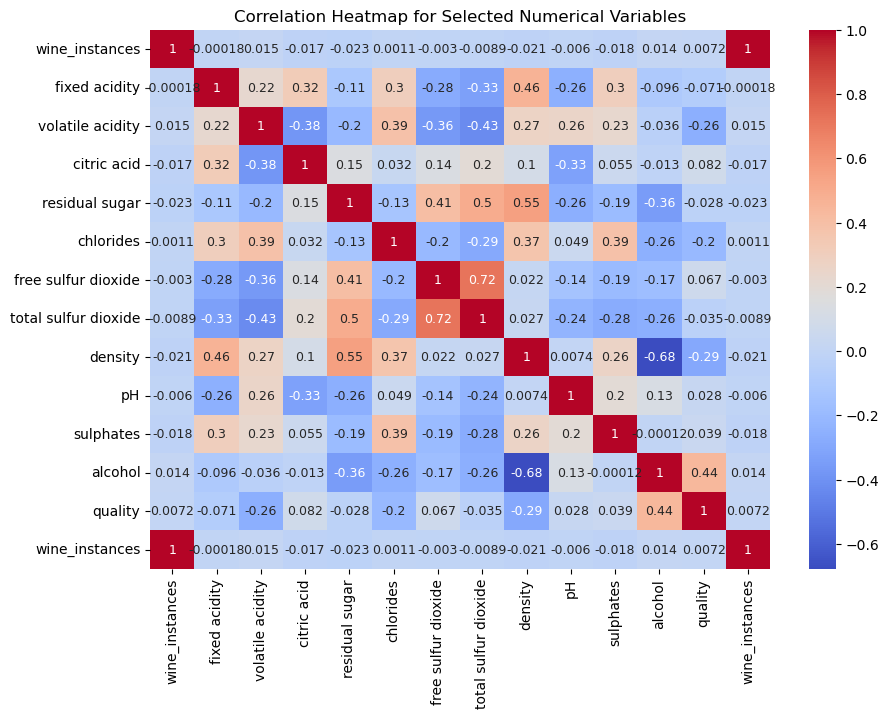

In [61]:
correlation_matrix = df_num.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 7))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 9})


plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()